In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np


In [4]:
import os
import imghdr

In [15]:
img_ext = ['png','jpg','jpeg','bmp']
data_dir = 'data'
for folder in os.listdir(data_dir):
   
    for image in os.listdir(os.path.join(data_dir,folder)):
        
        img_path = os.path.join(data_dir,folder,image)
        
        tip = imghdr.what(img_path)
        
        try:
            if tip not in img_ext:
                os.remove(img_path)
        except Exception as e:
            print('Issue with the image in path {}'.format(img_path))
            

In [18]:
tf.keras.utils.image_dataset_from_directory(data_dir)


Found 311 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [44]:
tf.data.Dataset??

In [19]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 311 files belonging to 2 classes.


In [43]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [23]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

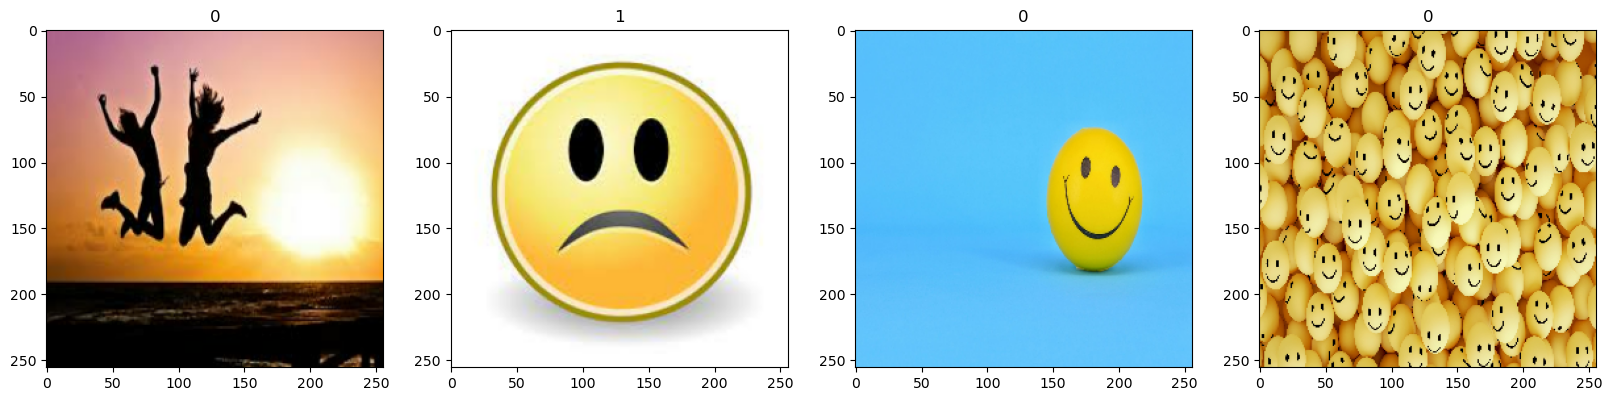

In [39]:
fig,ax = plt.subplots(ncols = 4, figsize=(20,20))
for idx,img_dx in enumerate (batch[0][:4]):
    ax[idx].imshow(img_dx.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [47]:
data.map(lambda x,y: (x/2,255))

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [171]:
image = cv2.imread(r"C:\Users\K\Downloads\IMG_20230302_180118.jpg")
def imshow(title='',image=None,size=10):
    w,h = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(aspect_ratio*size,size))
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [172]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\K\Downloads\haarcascade_frontalface_default.xml")

In [173]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 

In [174]:
faces = face_cascade.detectMultiScale(gray_image,scaleFactor=2.6,minNeighbors=2,flags = None,minSize=(5,5))

In [175]:
faces

array([[1198,   35,   62,   62],
       [1214, 1249, 1097, 1097]])

In [176]:
annot_image = image.copy()
for x,y,w,h in faces:
    
    cv2.rectangle(annot_image,(x,y),(x+w,y+h),(0,255,255),5)

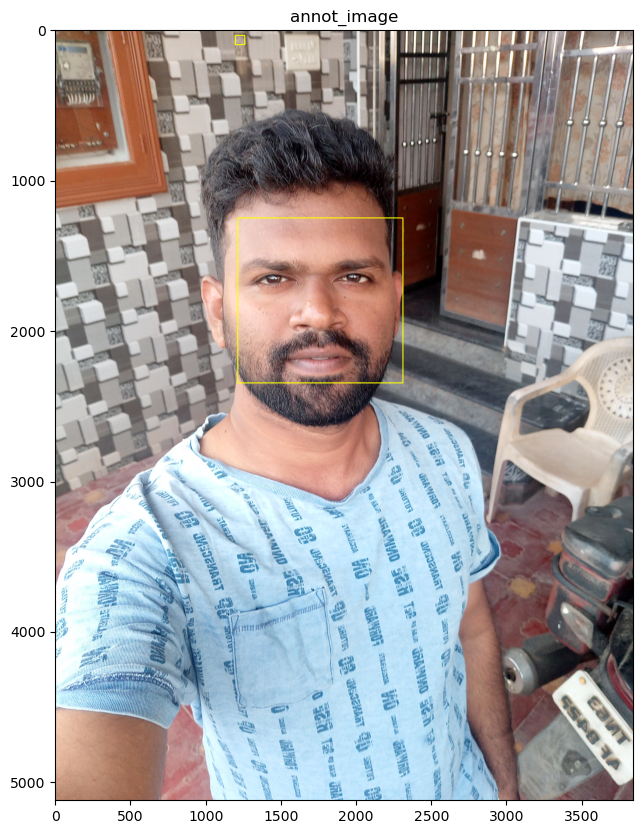

In [177]:
imshow('annot_image',annot_image)

In [181]:
eye_classifier = cv2.CascadeClassifier(r"C:\Users\K\Downloads\haarcascade_eye.xml")
eyes = eye_classifier.detectMultiScale(gray_image,scaleFactor=20,minNeighbors=3,minSize=(350,500))

In [182]:
annot_image = image.copy()
for x,y,w,h in faces:
    cv2.rectangle(annot_image,(x,y),(x+w,y+h),(0,255,255),5)
    for x,y,w,h in eyes:
        cv2.rectangle(annot_image,(x,y),(x+w,y+h),(0,255,255),5)

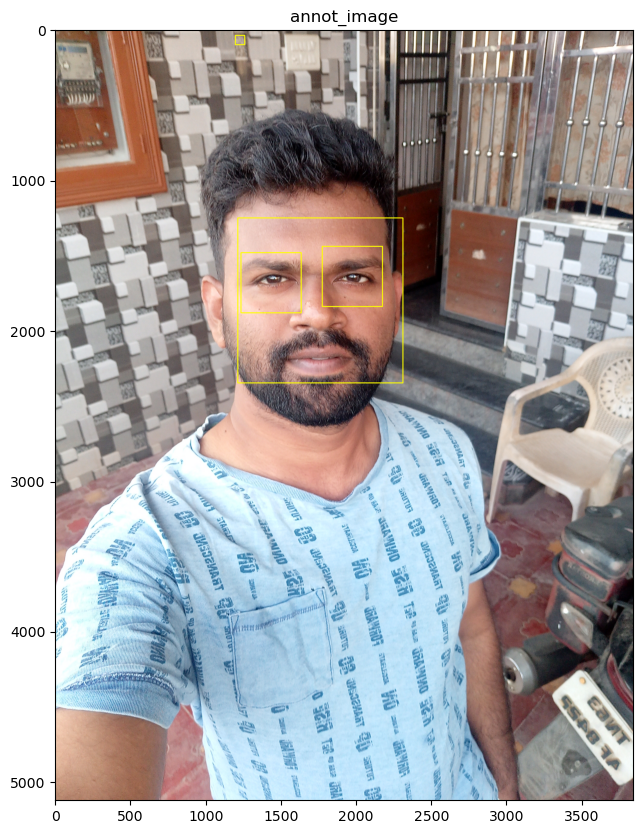

In [183]:
imshow('annot_image',annot_image)

In [200]:
image = cv2.imread(r"C:\Users\K\Downloads\IMG_20230302_180118.jpg")

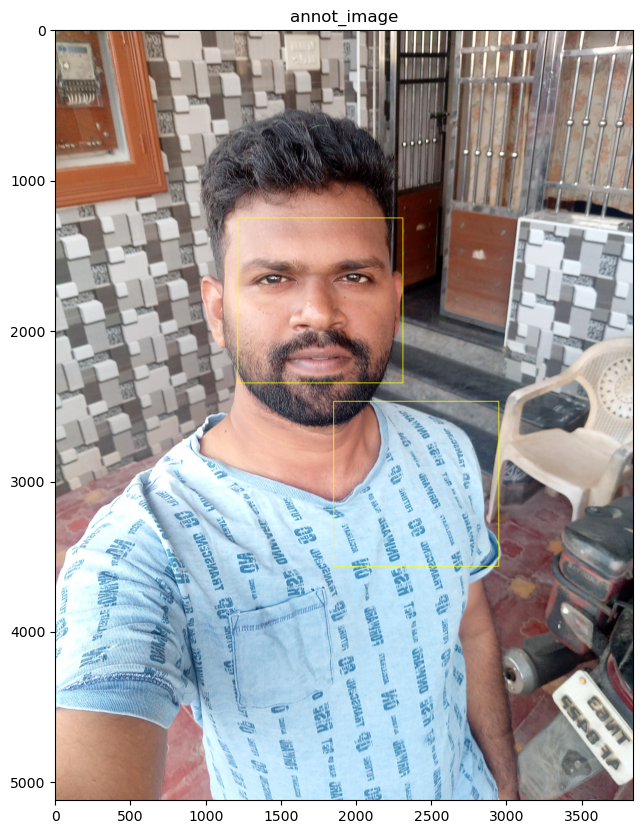

In [204]:
face_classifier = cv2.CascadeClassifier(r"C:\Users\K\Downloads\haarcascade_frontalface_default.xml")
min_width = int(0.1*image.shape[0])
min_height = int(0.1*image.shape[1])
faces = face_classifier.detectMultiScale(gray_image,scaleFactor=2.6,minNeighbors=1,minSize=(500,300))
eye_classifier = cv2.CascadeClassifier(r"C:\Users\K\Downloads\haarcascade_frontalface_default.xml")
eyes = eye_classifier.detectMultiScale(gray_image,scaleFactor=20,minNeighbors=3,minSize=(500,300))
annot_image = image.copy()
for x,y,w,h in faces:
    cv2.rectangle(annot_image,(x,y),(x+w,y+h),(0,255,255),3)
    for ex,ey,ew,eh in eyes:
        cv2.rectangle(annot_image,(ex,ey),(ex+ew,ey+eh),(0,255,255),7)
imshow('annot_image',annot_image)

In [188]:
min_width,min_height

(512, 384)

In [203]:
faces

array([[1851, 2468, 1097, 1097],
       [1214, 1249, 1097, 1097]])

In [226]:
cap = cv2.VideoCapture(0)
ret,frame = cap.read()
data_dir='data'
count = 0
while True:
    count += 1
    if count == 100 or cv2.waitKey(1) == 13:
        break
    else:
        file_name_path = './Images/' + str(count) + '.jpg'
        frame_image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        cv2.imwrite(file_name_path,frame_image)
cap.release()    

In [217]:
cap.release() 

In [238]:
import tarfile
import dlib

ModuleNotFoundError: No module named 'dlib'

In [239]:
!pip install dlib

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [6 lines of output]
  running bdist_wheel
  running build
  running build_ext
  
  ERROR: CMake must be installed to build dlib
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for dlib
ERROR: Could not build wheels for dlib, which is required to install pyproject.toml-based projects



  Using cached dlib-19.24.4.tar.gz (3.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build dlib


In [230]:
!pip install deepface


     -------------------------------------- 97.3/97.3 kB 696.4 kB/s eta 0:00:00
     ---------------------------------------- 88.4/88.4 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.3/2.3 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 84.4/84.4 kB 1.6 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117047 sha256=0af730a229deffda1979b6187a1959e4bdeb335b490788c38723ffd7bc15d923
  Stored in directory: c:\users\k\appdata\local\pip\cache\wheels\83\a4\63\e996d8e2cc83e0bb16b0c9ad526bd48d69d8cc284f8fe06784
Successfully built fire


In [232]:
!pip install imutils



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=9b237de6c29f705c8e277e154851d87d0ee7b2f107ad76c4df5b55f75b483238
  Stored in directory: c:\users\k\appdata\local\pip\cache\wheels\c2\02\32\f3617a9f68bcc67eda3ebeb4514eba18f62e81ff439428109d
Successfully built imutils


In [240]:
from imutils import face_utils

p = r"C:\Users\K\Downloads\shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

#image = cv2.imread('me.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
# Get faces 
rects = detector(gray, 0)

# For each detected face, find the landmark.
for (i, rect) in enumerate(rects):
    # Make the prediction and transfom it to numpy array
    shape = predictor(gray, rect)
    shape = face_utils.shape_to_np(shape)
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Draw on our image, all the finded cordinate points (x,y) 
    for (x, y) in shape:
        cv2.circle(image, (x, y), 2, (0, 255, 0), -1)

# Show the image
imshow("Output", image)

NameError: name 'dlib' is not defined

In [248]:
path = r"C:\Users\K\Downloads\New folder (3)\Tasks_C176\Tasks_C176\II"

from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPool2D,Convolution2D,Flatten
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

In [249]:
data_gen = ImageDataGenerator(rescale = 1./255,validation_split=0.2)


In [251]:
train_generator = data_gen.flow_from_directory(path,target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,subset='training')

Found 0 images belonging to 0 classes.


In [252]:
test_generator = data_gen.flow_from_directory(path,target_size=(256, 256),
    color_mode='rgb',
    classes=None,
    class_mode='binary',
    batch_size=32,subset='training')

Found 0 images belonging to 0 classes.


In [253]:
# Step 1: Install gdown
!pip install gdown

# Step 2: Download the files
!gdown --id 1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
!gdown --id 1txWignSWdELl8cWdZHYqIlSE2ZRjI8WI
!gdown --id 1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
!gdown --id 1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI

# Step 3: Create the destination directory (if it doesn't already exist)
!mkdir -p /root/.deepface/weights/

# Step 4: Move the files to the specified directory
!mv facial_expression_model_weights.zip /root/.deepface/weights/facial_expression_model_weights.zip
!mv age_model_weights.h5 /root/.deepface/weights/age_model_weights.h5
!mv gender_model_weights.h5 /root/.deepface/weights/gender_model_weights.h5
!mv race_model_single_batch.zip /root/.deepface/weights/race_model_single_batch.zip


C:\Users\K\anaconda3\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Id32-d-nS9BooBLLkw1PQhvLWWAukCsq
To: C:\Users\K\Downloads\CNN practice\facial_expression_model_weights.zip

  0%|          | 0.00/5.54M [00:00<?, ?B/s]
  9%|9         | 524k/5.54M [00:00<00:03, 1.38MB/s]
 19%|#8        | 1.05M/5.54M [00:00<00:03, 1.39MB/s]
 28%|##8       | 1.57M/5.54M [00:00<00:02, 1.93MB/s]
 38%|###7      | 2.10M/5.54M [00:01<00:01, 2.38MB/s]
 47%|####7     | 2.62M/5.54M [00:01<00:00, 2.96MB/s]
 57%|#####6    | 3.15M/5.54M [00:01<00:00, 2.59MB/s]
 66%|######6   | 3.67M/5.54M [00:01<00:01, 1.73MB/s]
 85%|########5 | 4.72M/5.54M [00:02<00:00, 2.77MB/s]
 95%|#########4| 5.24M/5.54M [00:02<00:00, 3.10MB/s]
100%|##########| 5.54M/5.54M [00:02<00:00, 2.52MB/s]
C:\Users\K\anaconda3\lib\site-packages\gdown\_

C:\Users\K\anaconda3\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY
From (redirected): https://drive.google.com/uc?id=1d_tQRWjvQ5i4lZyUfFEfRj7LzXWXseBY&confirm=t&uuid=158a33f0-8b76-455d-afa6-efeb93dc4b7a
To: C:\Users\K\Downloads\CNN practice\gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  0%|          | 524k/537M [00:00<07:00, 1.28MB/s]
  0%|          | 1.05M/537M [00:00<04:29, 1.99MB/s]
  0%|          | 1.57M/537M [00:00<03:25, 2.61MB/s]
  0%|          | 2.10M/537M [00:00<02:51, 3.12MB/s]
  0%|          | 2.62M/537M [00:00<02:50, 3.14MB/s]
  1%|          | 3.15M/537M [00:01<02:39, 3.36MB/s]
  1%|          | 3.67M/537M [00:01<02:48, 3.16MB/s]
  1%|          | 4.19M/537M [00:01<02:43, 3.26MB/s]
  1%|          | 4.72M/537

C:\Users\K\anaconda3\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Error:

	HTTPSConnectionPool(host='drive.google.com', port=443): Max retries
	exceeded with url: /uc?id=1kWp2CVg_xTIFqdZAwfN_86A3grim9NyI (Caused by
	ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at
	0x000002C324B26BF0>, 'Connection to drive.google.com timed out.
	(connect timeout=None)'))

To report issues, please visit https://github.com/wkentaro/gdown/issues.
The syntax of the command is incorrect.
'mv' is not recognized as an internal or external command,
operable program or batch file.
'mv' is not recognized as an internal or external command,
operable program or batch file.
'mv' is not recognized as an internal or external command,
operable program or batch file.
'mv' is not recognized as an internal or external command,
operable program or batch 